In [17]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
from functions_old.multi_gradient_descent import *
from math import log

In [18]:
# ls = []
# leadger = []
# def categorical_data(x):
#     if x not in ls:
#         ls.append(x)
#     return ls.index(x)

# data['diagnosis'] = data['diagnosis'].apply(categorical_data)
# leadger.append(ls)
# ls =[]
# data['loc'] = data['loc'].apply(categorical_data)
# leadger.append(ls)
# ls =[]
# data['stereo'] = data['stereo'].apply(categorical_data)
# leadger.append(ls)
# ls =[]
# data['sex'] = data['sex'].apply(categorical_data)
# leadger.append(ls)
# ls =[]
# print(leadger)
# # data
# x_data = np.array(data[['ki','gtv']])
# y_data = np.array(data['status'])


In [40]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def fun(x,w,b):
    return sigmoid(np.dot(w,x) + b)

def cost(x,y,w,b):
    k = 0
    for i in range(x.shape[0]):
        k += -log(sigmoid(np.dot(w,x[i]) + b))*y[i] - log(1-sigmoid(np.dot(w,x[i])+b))*(1-y[i])
    return k/x.shape[1]

def compute_gradient(x,y,w,b):
    dj_dw = np.zeros(x.shape[1])
    dj_db = 0
    for i in range(x.shape[0]):
        k = fun(x[i],w,b)-y[i]
        for j in range(x.shape[1]):
            dj_dw[j] += k*x[i][j]
        dj_db += k
    return dj_dw/x.shape[0],dj_db/x.shape[0]

def logistic_descent(x,y):
    alpha = 0.01
    w = np.zeros(x.shape[1])
    b =0
    for i in range(10000):
    
        dj_dw,dj_db = compute_gradient(x,y,w,b)

        w = w - alpha*dj_dw
        b = b- alpha*dj_db
        if i%100 ==0:
            print(w,b,"-------------------------------- cost: ",cost(x,y,w,b))
            pass
    return w,b





In [41]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

per_w,per_b = logistic_descent(X_train,y_train)
print(per_w,per_b)

[0.0025     0.00166667] 0.0 -------------------------------- cost:  2.076747943556848
[0.16543179 0.09922341] -0.05014653558288621 -------------------------------- cost:  1.9521297546186085
[0.24898437 0.13770963] -0.14360533027278033 -------------------------------- cost:  1.8999287695189337
[0.30846869 0.16268331] -0.24724789977961115 -------------------------------- cost:  1.8551692561200124
[0.35885531 0.18569906] -0.35235789254301847 -------------------------------- cost:  1.812815198062058
[0.40466423 0.20957405] -0.45655445260509636 -------------------------------- cost:  1.7722391248803147
[0.44747997 0.23478301] -0.5592037612664584 -------------------------------- cost:  1.7332233901310676
[0.48800274 0.26119741] -0.6601637915100677 -------------------------------- cost:  1.6956264824716292
[0.52663552 0.2885664 ] -0.7594299962219178 -------------------------------- cost:  1.6593420228771305
[0.56365996 0.31664509] -0.8570344598405929 -------------------------------- cost:  1.

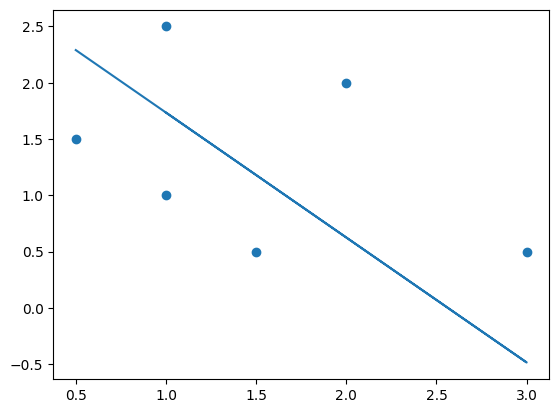

In [42]:
boundary = np.array([ [x[0] ,(-per_w[0]*x[0]-per_b)/per_w[1]]  for x in X_train])

pl.scatter(X_train[:,0], X_train[:,1])
pl.plot(boundary[:,0], boundary[:,1])
pl.show()